# Data Preprocessing Notebook for Google Colab

This notebook demonstrates basic data preprocessing steps using Python and pandas in Google Colab.

In [ ]:
# Install required libraries (uncomment if needed)
# !pip install pandas numpy scikit-learn matplotlib seaborn

# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# Load sample dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv"
df = pd.read_csv(url, header=None, na_values='?')
df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

print("Dataset loaded successfully.")
df.head()

Dataset loaded successfully.


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


https://github.com/jbrownlee/Datasets

## Basic Information

In [ ]:
# Display basic information about the dataset
print(df.info())

# Display summary statistics
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB
None


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Shape of the dataset: (506, 14)


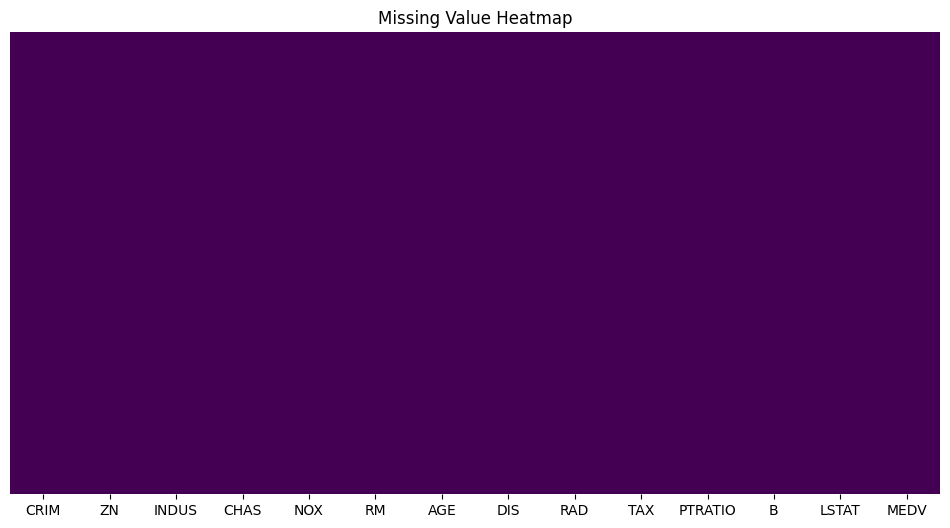

In [ ]:
# Display the shape of the dataset
print("Shape of the dataset:", df.shape)

# Visualize missing values
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap='viridis')
plt.title('Missing Value Heatmap')
plt.show()

## Handling Missing Values

In [ ]:
# Check for missing values
print(df.isnull().sum())

# Impute missing values with mean
imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

print("\nMissing values after imputation:")
print(df_imputed.isnull().sum())

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

Missing values after imputation:
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


## Normalization

In [ ]:
# Normalize numerical columns using StandardScaler
scaler = StandardScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(df_imputed), columns=df_imputed.columns)

print("Normalized data:")
df_normalized.describe()

Normalized data:


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,506.000000,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02
mean,-1.123388e-16,7.898820e-17,2.106352e-16,-3.510587e-17,-1.965929e-16,-1.088282e-16,-1.474446e-16,-8.425408e-17,-1.123388e-16,0.000000,-4.212704e-16,-7.442444e-16,-3.089316e-16,-5.195668e-16
std,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00
min,-4.197819e-01,-4.877224e-01,-1.557842e+00,-2.725986e-01,-1.465882e+00,-3.880249e+00,-2.335437e+00,-1.267069e+00,-9.828429e-01,-1.313990,-2.707379e+00,-3.907193e+00,-1.531127e+00,-1.908226e+00
25%,-4.109696e-01,-4.877224e-01,-8.676906e-01,-2.725986e-01,-9.130288e-01,-5.686303e-01,-8.374480e-01,-8.056878e-01,-6.379618e-01,-0.767576,-4.880391e-01,2.050715e-01,-7.994200e-01,-5.994557e-01
50%,-3.906665e-01,-4.877224e-01,-2.110985e-01,-2.725986e-01,-1.442174e-01,-1.084655e-01,3.173816e-01,-2.793234e-01,-5.230014e-01,-0.464673,2.748590e-01,3.811865e-01,-1.812536e-01,-1.450593e-01
75%,7.396560e-03,4.877224e-02,1.015999e+00,-2.725986e-01,5.986790e-01,4.827678e-01,9.067981e-01,6.623709e-01,1.661245e+00,1.530926,8.065758e-01,4.336510e-01,6.030188e-01,2.685231e-01
max,9.933931e+00,3.804234e+00,2.422565e+00,3.668398e+00,2.732346e+00,3.555044e+00,1.117494e+00,3.960518e+00,1.661245e+00,1.798194,1.638828e+00,4.410519e-01,3.548771e+00,2.989460e+00


## Categorical to Continuous Conversion

In [ ]:
# For demonstration, let's assume 'CHAS' is a categorical variable
# Convert 'CHAS' to categorical
df_normalized['CHAS'] = df_normalized['CHAS'].astype('category')

# One-hot encoding
df_encoded = pd.get_dummies(df_normalized, columns=['CHAS'])

print("Encoded data:")
df_encoded.head()

Encoded data:


,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CHAS_-0.27259856706992697,CHAS_3.668397859712446
0,-0.419782,0.284830,-1.287909,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562,0.159686,True,False
1,-0.417339,-0.487722,-0.593381,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439,-0.101524,True,False
2,-0.417342,-0.487722,-0.593381,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727,1.324247,True,False
3,-0.416750,-0.487722,-1.306878,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517,1.182758,True,False
4,-0.412482,-0.487722,-1.306878,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501,1.487503,True,False


## Other Preprocessing Steps

In [ ]:
# Remove outliers (example: remove rows where 'MEDV' is more than 3 standard deviations from the mean)
mean = df_encoded['MEDV'].mean()
std = df_encoded['MEDV'].std()
df_no_outliers = df_encoded[(df_encoded['MEDV'] > mean - 3*std) & (df_encoded['MEDV'] < mean + 3*std)]

print("Shape after removing outliers:", df_no_outliers.shape)

# Feature selection (example: select top 5 features correlated with 'MEDV')
correlations = df_no_outliers.corr()['MEDV'].abs().sort_values(ascending=False)
top_features = correlations[1:6].index.tolist()
df_selected = df_no_outliers[top_features + ['MEDV']]

print("\nSelected features:")
print(df_selected.columns)

Shape after removing outliers: (506, 15)

Selected features:
Index(['LSTAT', 'RM', 'PTRATIO', 'INDUS', 'TAX', 'MEDV'], dtype='object')


## Final Preprocessed Dataset

In [ ]:
print("Final preprocessed dataset:")
df_selected.head()

Final preprocessed dataset:


,LSTAT,RM,PTRATIO,INDUS,TAX,MEDV
0,-1.075562,0.413672,-1.459000,-1.287909,-0.666608,0.159686
1,-0.492439,0.194274,-0.303094,-0.593381,-0.987329,-0.101524
2,-1.208727,1.282714,-0.303094,-0.593381,-0.987329,1.324247
3,-1.361517,1.016303,0.113032,-1.306878,-1.106115,1.182758
4,-1.026501,1.228577,0.113032,-1.306878,-1.106115,1.487503


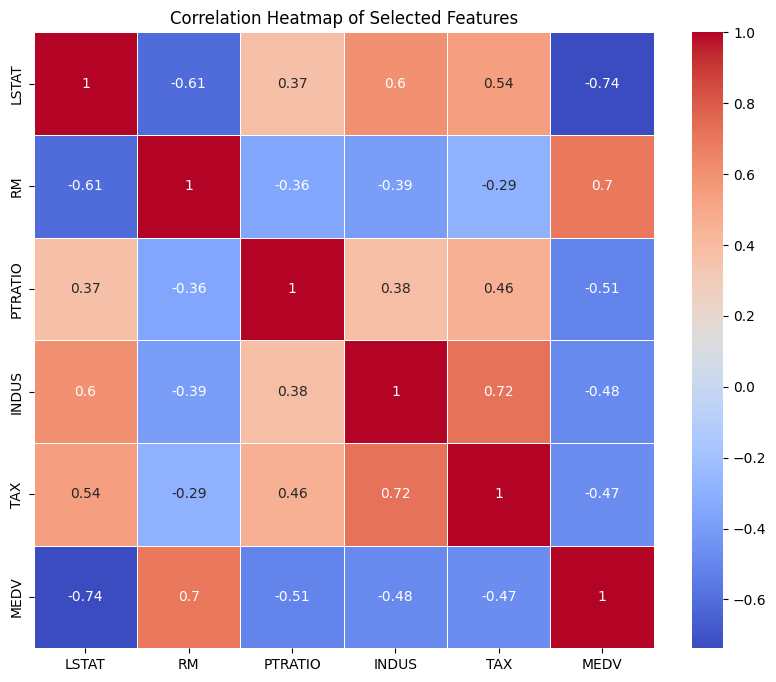

In [ ]:
# Visualize correlations in the final dataset
plt.figure(figsize=(10, 8))
sns.heatmap(df_selected.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Selected Features')
plt.show()

In [ ]:
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Generate sample data
X = np.random.randn(1000, 2)  # 1000 samples, 2 features
y = (X[:, 0] + X[:, 1] > 0).astype(int)  # Binary classification

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Make predictions
y_pred = gnb.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Predict probability for a single instance
single_instance = np.array([[0.5, -0.5]])
prob = gnb.predict_proba(single_instance)
print(f"Probabilities for single instance: {prob}")

Accuracy: 0.97
Probabilities for single instance: [[0.49136104 0.50863896]]


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Sample text data
texts = [
    "I love this movie", "Great film", "Terrible movie", "Waste of time",
    "Awesome acting", "Boring plot", "Excellent direction", "Poor screenplay",
    "Fantastic cinematography", "Dull characters"
]
labels = [1, 1, 0, 0, 1, 0, 1, 0, 1, 0]  # 1 for positive, 0 for negative

# Convert text to numerical features
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(texts)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=42)

# Create and train the model
mnb = MultinomialNB()
mnb.fit(X_train, y_train)

# Make predictions
y_pred = mnb.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Predict for a new text
new_text = ["This movie was amazing"]
new_X = vectorizer.transform(new_text)
prob = mnb.predict_proba(new_X)
print(f"Probabilities for new text: {prob}")

Accuracy: 0.00
Probabilities for new text: [[0.38950715 0.61049285]]


In [ ]:
import numpy as np
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Generate sample binary data
X = np.random.randint(2, size=(1000, 5))  # 1000 samples, 5 binary features
y = (X[:, 0] & X[:, 1]).astype(int)  # Binary classification

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
bnb = BernoulliNB()
bnb.fit(X_train, y_train)

# Make predictions
y_pred = bnb.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Predict for a single instance
single_instance = np.array([[1, 1, 0, 1, 0]])
prob = bnb.predict_proba(single_instance)
print(f"Probabilities for single instance: {prob}")

Accuracy: 1.00
Probabilities for single instance: [[0.22649866 0.77350134]]
